# Preprocessing of the data

## Libraries

In [1]:
from libraries import *
import baseFunctions as bf
plt.style.use('ggplot')



# Select GPU device for the training if available
if not torch.cuda.is_available():
    device=torch.device("cpu")
    print("Current device:", device)
else:
    device=torch.device("cuda")
    print("Current device:", device, "- Type:", torch.cuda.get_device_name(0))
    bf.get_memory()



Current device: cuda - Type: NVIDIA GeForce RTX 2070 SUPER
Total memory: 8.589475839999999
Reserved memory: 0.0
Allocated memory: 0.0
Free memory: 0.0


## Statistics preprocessing

In this section we applied a preprocessing of the statistics data of the vehicol, converting all the data in float and adding a column for link the frame with the relatives statistics.

In [4]:
data = pd.read_csv('./Data/data.txt', sep = ";", index_col=0, dtype=str)

In [5]:
def converter(array):
    
    def conv(x):
        x = x.replace(",",".")
        return float(x)


    out = list(map(conv, list(map(str, array))))
    
    return out


data["acceleration"] = converter(data["acceleration"].array)
data["speed"] = converter(data["speed"].array)
data["steeringScale"] = converter(data["steeringScale"].array)
data["steeringAngle"] = converter(data["steeringAngle"].array)

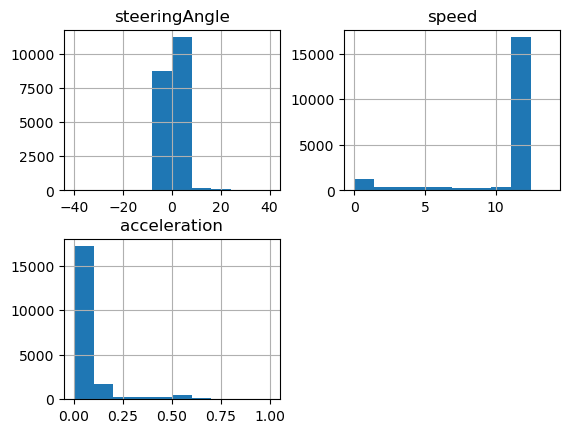

In [6]:
data[['steeringAngle', 'speed', 'acceleration']].hist();

In [7]:
#Select all the images names
images = []

for i in tqdm(range(1, 20407)):
    imgName = f"image{i}.jpg"
    images.append(imgName)
    

  0%|          | 0/20406 [00:00<?, ?it/s]

In [9]:
#We have more frame than statistics usally
data["frames"] = images[:20393]
data.drop(data.index[:100], inplace = True)
data.drop(data.index[20300:], inplace = True)
data.drop("steeringScale", axis = 1, inplace=True)
data.to_csv("./Data/data.csv")

## Test of final dataset

tensor([[ 0.9329, 11.8846,  0.0579]], dtype=torch.float64)


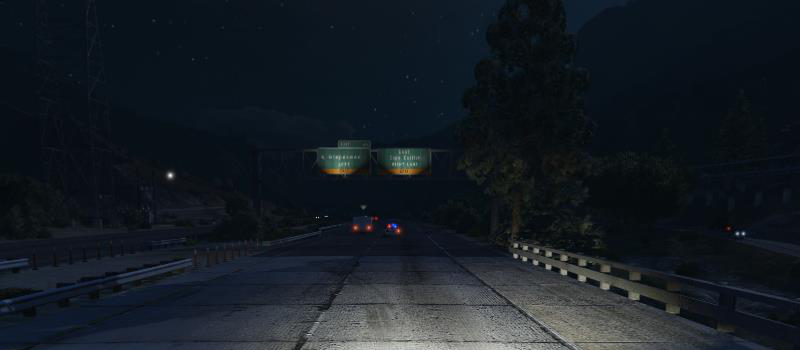

In [2]:
train_dataset = bf.GTADataset("data.csv", DATA_ROOT_DIR, bf.preprocess)
dataloader = DataLoader(train_dataset, batch_size=4, shuffle=True, num_workers=0)

for i_batch, sample_batched in enumerate(dataloader):
    b = sample_batched
    break
    
print(b["statistics"][0])
F.to_pil_image(b["img"][0])